In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df_train1=pd.read_csv("heart_2020_cleaned.csv")
df_train1["source"]="train"

df_train = df_train1[:200000]
df_test = df_train1[200001:]
#df_test=pd.read_csv("dataset/test.csv")
#df_test["source"]="test"
df=pd.concat([df_train,df_test],
              ignore_index=True)
df_train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,source
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,train
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,train
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,train
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,train
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,train


In [56]:
df.shape

(319794, 19)

In [57]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
source                 1
dtype: int64

array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>],
       [<AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'SleepTime'}>]], dtype=object)

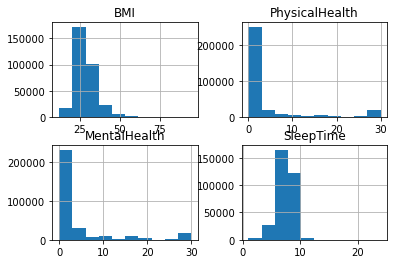

In [58]:
heart_num = df.select_dtypes('float64')
heart_num.hist()

## 数据清洗 因为用的kaggle清洗过的数据 所以不需要

In [59]:
df.isnull().sum()

#填充空值
#df['']= df[''].fillna("NA")

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
source              0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319794 entries, 0 to 319793
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319794 non-null  object 
 1   BMI               319794 non-null  float64
 2   Smoking           319794 non-null  object 
 3   AlcoholDrinking   319794 non-null  object 
 4   Stroke            319794 non-null  object 
 5   PhysicalHealth    319794 non-null  float64
 6   MentalHealth      319794 non-null  float64
 7   DiffWalking       319794 non-null  object 
 8   Sex               319794 non-null  object 
 9   AgeCategory       319794 non-null  object 
 10  Race              319794 non-null  object 
 11  Diabetic          319794 non-null  object 
 12  PhysicalActivity  319794 non-null  object 
 13  GenHealth         319794 non-null  object 
 14  SleepTime         319794 non-null  float64
 15  Asthma            319794 non-null  object 
 16  KidneyDisease     31

array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>],
       [<AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'SleepTime'}>]], dtype=object)

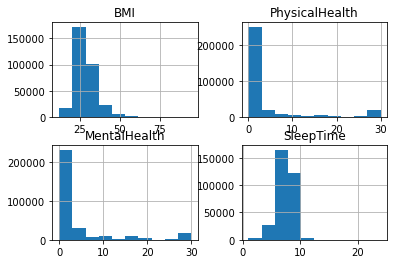

In [61]:
heart_num = df.select_dtypes('float64')
heart_num.hist()

## HeartDisease  是我们的分类最终结果 也就是y值 需要转换成float类型

In [62]:
df["HeartDisease"].replace(["Yes","No"]
            ,[1,0], inplace=True)
df['HeartDisease'] = df['HeartDisease'].astype(float)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,source
0,0.0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,train
1,0.0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,train
2,0.0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,train
3,0.0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,train
4,0.0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,train


## 把特征编码 将特征转换为数字形式

In [63]:
#创建分类列列表
cat_col=['BMI', 'Smoking',
        'AlcoholDrinking','Stroke','DiffWalking',
        'Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:  
    df[col]= le.fit_transform(df[col])
    
df_2= df
df_2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,source
0,0.0,223,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1,train
1,0.0,524,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0,train
2,0.0,1103,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0,train
3,0.0,883,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1,train
4,0.0,837,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0,train


## T：F= 9：91 不平衡数据的处理，通常使用SMOTE，在这里欠采样方法来处理平衡数据集

In [64]:
from sklearn.utils import resample
# 将少数类和多数类分开
df_majority = df[df['HeartDisease']==0]
df_minority = df[df['HeartDisease']==1]
print("多数类(No)值为", len(df_majority))
print("少数类值(YES)是", len(df_minority))
print("两个类的比例是", len(df_majority)/len(df_minority))

多数类(No)值为 292421
少数类值(YES)是 27373
两个类的比例是 10.682826142549228


In [65]:
# 欠采样多数类
df_majority_undersampled = resample(df_majority,
      replace=True,
      n_samples=len(df_minority),
      random_state=0)
# 结合少数类和过采样的多数类
df_undersampled = pd.concat([df_minority, 
          df_majority_undersampled])
df_undersampled['HeartDisease'].value_counts()
df_1=df_undersampled

In [66]:
# 显示新的类值计数
print("欠采样类值计数为：", len(df_undersampled))
print("两个类的比例为：", 
        len(df_undersampled[df_undersampled["HeartDisease"]==0]
        )/len(df_undersampled[df_undersampled["HeartDisease"]==1]))

df_1.head()

欠采样类值计数为： 54746
两个类的比例为： 1.0


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,source
5,1.0,1309,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0,train
10,1.0,1786,1,0,0,30.0,0.0,1,1,8,5,2,0,3,15.0,1,0,0,train
35,1.0,1672,1,0,1,10.0,0.0,1,1,11,5,2,1,3,4.0,0,0,1,train
42,1.0,962,0,0,0,0.0,0.0,1,0,12,5,2,0,2,7.0,0,0,1,train
43,1.0,1432,1,0,0,6.0,2.0,1,0,11,5,2,1,1,8.0,0,1,0,train


In [67]:
# 删除目标变量 
xc = df_1.drop(columns=['HeartDisease','source'])
yc = df_1[["HeartDisease"]]

## 标准化数据

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
#Standard Scaler的实例
df_xc = pd.DataFrame(sc.fit_transform(xc),columns=xc.columns)
df_xc

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.039501,1.013461,-0.244285,-0.320788,0.062091,-0.498146,1.769770,-1.056308,0.960515,-2.104417,-0.567007,-1.587083,-0.866179,3.045169,-0.430300,-0.289446,-0.392125
1,0.920519,1.013461,-0.244285,-0.320788,2.472904,-0.498146,1.769770,0.946693,0.072316,0.459093,1.781053,-1.587083,0.581379,4.914117,2.323961,-0.289446,-0.392125
2,0.709961,1.013461,-0.244285,3.117322,0.463893,-0.498146,1.769770,0.946693,0.960515,0.459093,1.781053,0.630087,0.581379,-1.938693,-0.430300,-0.289446,2.550209
3,-0.601407,-0.986717,-0.244285,-0.320788,-0.540612,-0.498146,1.769770,-1.056308,1.256582,0.459093,1.781053,-1.587083,-0.142400,-0.069745,-0.430300,-0.289446,2.550209
4,0.266682,1.013461,-0.244285,-0.320788,0.062091,-0.264358,1.769770,-1.056308,0.960515,0.459093,1.781053,0.630087,-0.866179,0.553238,-0.430300,3.454881,-0.392125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54741,-1.827813,1.013461,-0.244285,-0.320788,-0.540612,-0.498146,-0.565045,-1.056308,-1.111950,0.459093,-0.567007,0.630087,-1.589957,1.176221,-0.430300,-0.289446,-0.392125
54742,-0.350215,-0.986717,-0.244285,-0.320788,-0.540612,-0.498146,1.769770,-1.056308,-0.519817,0.459093,-0.567007,0.630087,-0.142400,-0.069745,-0.430300,-0.289446,-0.392125
54743,-1.334665,-0.986717,-0.244285,-0.320788,-0.540612,-0.381252,-0.565045,-1.056308,-2.296216,0.459093,-0.567007,0.630087,1.305158,0.553238,-0.430300,-0.289446,-0.392125
54744,1.262213,1.013461,-0.244285,-0.320788,0.463893,-0.381252,-0.565045,-1.056308,-0.815884,0.459093,-0.567007,0.630087,-0.866179,-0.692728,-0.430300,-0.289446,-0.392125


### 1.逻辑回归分类器
### 2.随机森林分类器
### 3.决策树分类器
### 4.高斯贝叶斯分类器

In [69]:
#Importing necessary libraries
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [70]:
#defining a function to find fit of the model

def max_accuracy_scr(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    roc_scr_max=0
    train_xc,test_xc,train_yc,test_yc = train_test_split(df_xc,yc,
                random_state = 42,test_size = 0.2,stratify = yc)
    model_c.fit(train_xc,train_yc)
    pred = model_c.predict_proba(test_xc)[:, 1]
    roc_score = roc_auc_score(test_yc, pred)
    accuracy_scr = accuracy_score(test_yc,model_c.predict(test_xc))
    if roc_score> roc_scr_max:
        roc_scr_max=roc_score
        final_model = model_c
        mean_acc = cross_val_score(final_model,df_xc,yc,cv=5,
                                   scoring="accuracy").mean()
        std_dev = cross_val_score(final_model,df_xc,yc,cv=5,
                                  scoring="accuracy").std()
        cross_val = cross_val_score(final_model,df_xc,yc,cv=5,
                                     scoring="accuracy")
    print("*"*50)
    print("Results for model : ",names,'\n',
          "max roc score correspond to random state " ,roc_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    print(f"roc_auc_score: {roc_score}")
    print("*"*50)

In [71]:
accuracy_scr_max = []
models=[]
#accuracy=[]
std_dev=[]
roc_auc=[]
mean_acc=[]
cross_val=[]
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(("GausianNB",GaussianNB()))

for names,model_c in models:
    max_accuracy_scr(names,model_c,df_xc,yc)

**************************************************
Results for model :  Logistic Regression 
 max roc score correspond to random state  0.8227985404808074 
 Mean accuracy score is :  0.7502829398735775 
 Std deviation score is :  0.006304475759741396 
 Cross validation scores are :   [0.76045662 0.75166682 0.75002283 0.74847018 0.74079825]
roc_auc_score: 0.8227985404808074
**************************************************
**************************************************
Results for model :  Random Forest 
 max roc score correspond to random state  0.8186644481974937 
 Mean accuracy score is :  0.751068451446328 
 Std deviation score is :  0.0047920353581813535 
 Cross validation scores are :   [0.76       0.75376747 0.75321947 0.74609553 0.74609553]
roc_auc_score: 0.8186644481974937
**************************************************
**************************************************
Results for model :  Decision Tree Classifier 
 max roc score correspond to random state  0.679048727

In [72]:
# 使用随机森林分类器的网格搜索估计最佳
parameters={"n_estimators":[1,10,100]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, 
          cv=5,scoring="roc_auc")
clf.fit(df_xc,yc)
print("Best parameter : ",
      clf.best_params_,
      "\nBest Estimator : ",
      clf.best_estimator_,
      "\nBest Score : ",
      clf.best_score_)

Best parameter :  {'n_estimators': 100} 
Best Estimator :  RandomForestClassifier() 
Best Score :  0.8208358278746104


In [73]:
rf_clf=RandomForestClassifier(n_estimators=100,random_state=42)

max_accuracy_scr("RandomForest Classifier",rf_clf,df_xc,yc)

**************************************************
Results for model :  RandomForest Classifier 
 max roc score correspond to random state  0.818159621359021 
 Mean accuracy score is :  0.7504108504727814 
 Std deviation score is :  0.004765585274112839 
 Cross validation scores are :   [0.75799087 0.74901818 0.7535848  0.74609553 0.74536487]
roc_auc_score: 0.818159621359021
**************************************************


## 模型评价

In [ ]:
pred_pb=rf_clf.predict_proba(xc)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc,pred_pb,pos_label=True)
auc = roc_auc_score(yc,pred_pb)

print(" ROC_AUC score is ",auc)
print("accuracy score is : ",accuracy_score(yc,pred_pb))
print("Precision is : " ,precision_score(yc, pred_pb))
print("Recall is: " ,recall_score(yc, pred_pb))
print("F1 Score is : " ,f1_score(yc, pred_pb))
print("classification report \n",classification_report(yc,pred_pb))

#绘制混淆矩阵
cnf = confusion_matrix(yc,pred_pb)
sns.heatmap(cnf, annot=True, cmap = "magma")

In [ ]:
from lightgbm import LGBMClassifier

lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 10000,
             'max_bin': 84,
             'num_leaves': 10,
             'max_depth': 20,
             'reg_alpha': 8.457,
             'reg_lambda': 6.853,
             'subsample': 0.749}
             
lgb_model = cross_val(xc, yc, 
              LGBMClassifier, 
              lgb_params)